# Import data into X and y lists

In [1]:
import gzip, io, csv
import numpy as np

X, y = [], []
with io.TextIOWrapper(gzip.open("data/train.csv.gz", "r")) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i, row in enumerate(csvreader):
        if i == 0: continue
        vals = row[1:]
        X.append(vals)
        y.append([row[0]])

## Normalize

The image data contains values between 0 and 255 corresponding to the pixel value.

In [2]:
X = np.array(X, dtype=float)
X = X / 255
y = np.array(y, dtype=str)

## Plot the first 10 images

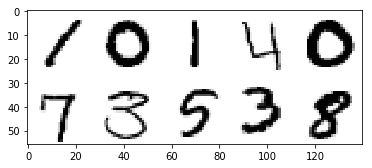

In [3]:
import matplotlib.pyplot as plt

def gimg(i):
    # images must be 28x28x3
    return np.reshape(
        # greyscale images using the same value for R G B
        np.column_stack(
            (X[i], X[i], X[i])
        ),
        (28, 28, 3)
    )


img = gimg(0)
for i in range(1, 5):
    img = np.column_stack((img, gimg(i)))

img1 = gimg(6)
for i in range(7, 11):
    img1 = np.column_stack((img1, gimg(i)))

img = 1 - np.row_stack((img, img1))

plt.imshow(img)
plt.show()

## Select training data size using 75% of the source

In [4]:
train_size = int(X.shape[0] * .75)

## PCA

Perform principle component analysis and use 50 features out of the 785.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
training_data = pca.fit_transform(X[:train_size], y[:train_size])

## Neural Network

Create a neural network with 
* 1 hidden layer using 30 hidden layer neurons
* Rectified Linear Unit (RELU) activation function
* Learning rate 0.00001
* LBFGS optimization algorithm

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter=3000,
                    hidden_layer_sizes=(30,), random_state=1)
clf.fit(training_data, y[:train_size].ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Results

Test the trained network against the remaining 25% of the dataset and print the classification report and confusion matrix

In [7]:
from sklearn import metrics

predicted = clf.predict(pca.transform(X[train_size:]))
actual = y[train_size:]
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1063
          1       0.98      0.98      0.98      1182
          2       0.94      0.94      0.94      1005
          3       0.93      0.93      0.93      1108
          4       0.95      0.95      0.95       985
          5       0.92      0.94      0.93       940
          6       0.98      0.95      0.96      1042
          7       0.95      0.96      0.95      1111
          8       0.93      0.93      0.93      1021
          9       0.95      0.93      0.94      1043

avg / total       0.95      0.95      0.95     10500

[[1036    0    6    1    1    6    6    0    6    1]
 [   0 1161    3    1    2    2    2    5    5    1]
 [   6    2  947   16    4    3    2   14   10    1]
 [   1    4   14 1026    2   27    1    9   17    7]
 [   3    5    1    1  939    1    8    5    3   19]
 [   9    3    3   21    3  883    1    4    9    4]
 [   8    1    8    1   11   14  994    0  